# SELLS PREDICTIONS 

This part aims to use Random Foret Regression to see if we can predict future sales.

In [1]:
import pandas as pd #Data manipulation
import numpy as np
import seaborn as sns #Hitograms
import plotly.express as px # Plots
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt #Plots
%matplotlib inline 


from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# My modules and classes
from OOP.clients_preprocess import clients_preprocessing as cp
from OOP.tickets_preprocess import tickets_preprocessing as tp
from OOP.process import data_process as dp

# Ignoring messages from pf.categories_by_person(absences) function\n",
warnings.filterwarnings("ignore")

###### Loading Datasets

In [2]:
tickets_process = tp()
tickets = tickets_process.payment_types_col()

In [3]:
clients_process=cp()
clients=clients_process.inputer()
clients=cp.age_outliers_replace(clients)

In [4]:
#Main data for predictions
clients_tickets = dp.clients_tickets_merge(clients_data =clients, tickets_data =tickets)
clients_tickets.columns

Index(['ticketID', 'clientID', 'storeID', 'ticketDate', 'payed', 'quantity',
       'class', 'postalCode', 'countryCode', 'gender', 'age', 'favoriteStore',
       'firstDate'],
      dtype='object')

###### Separating Categorical Variables From Numeric Variables

In [5]:
X = clients_tickets[['clientID','storeID','countryCode','gender','age']]

# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
X_categorical = X.select_dtypes(include=['object']).apply(le.fit_transform)
X = X.drop(X_categorical.columns, axis=1)
X = pd.concat([X, X_categorical], axis=1)
Y = clients_tickets['payed']

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [7]:
print( f'x_train:{x_train.shape}, x_test:{x_test.shape}')

x_train:(277910, 5), x_test:(119105, 5)


In [8]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277910 entries, 199671 to 121958
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   clientID     277910 non-null  int64
 1   age          277910 non-null  int32
 2   storeID      277910 non-null  int32
 3   countryCode  277910 non-null  int32
 4   gender       277910 non-null  int32
dtypes: int32(4), int64(1)
memory usage: 8.5 MB


###### Random Forest

In [9]:
regressor = RandomForestRegressor(n_estimators=200,random_state=42)

In [10]:
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [11]:
y_pred = regressor.predict(x_test)

In [18]:
result = pd.DataFrame(y_pred,y_test)
result

,0
payed,
30.35,17.494305
4.65,51.619030
25.55,48.239925
5.00,21.570559
3.90,13.806313
...,...
15.00,28.472654
65.10,11.723633
34.70,37.559873


In [21]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

-0.04868035904908119

The r2 reflects poor predictions. Hence this model does not work to predict the sales.

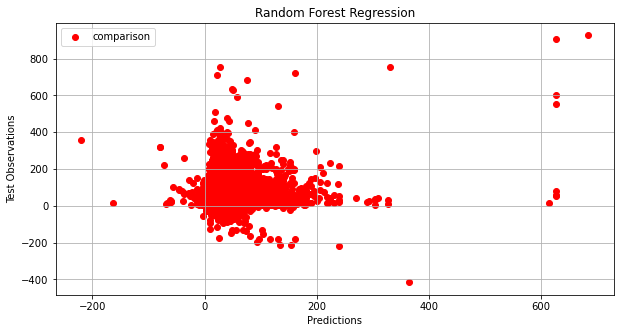

In [22]:
plt.figure(figsize =(10,5))
plt.scatter(y_pred,y_test, color = 'red', label = 'comparison')
plt.legend()
plt.grid()
plt.title('Random Forest Regression')
plt.xlabel('Predictions')
plt.ylabel('Test Observations')

plt.show()